In [0]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd

# Imports from the scikit-learn package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn import datasets

%matplotlib inline

In [0]:
boston = datasets.load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:** 

 :Number of Instances: 506 

 :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

 :Attribute Information (in order):
 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per $10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000's

 :Missing Attribute Values: None

 :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980. N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems. 
 
.. topic:: References

 - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
 - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

In [0]:
# Feel free to explore the boston dictionary

In [0]:
boston.keys()

Out[3]: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
X = boston.data
Y = boston.target
rows = X.shape[0]
cols = X.shape[1]
df = pd.DataFrame(X)
df.columns = boston.feature_names
df['MEDV'] = Y

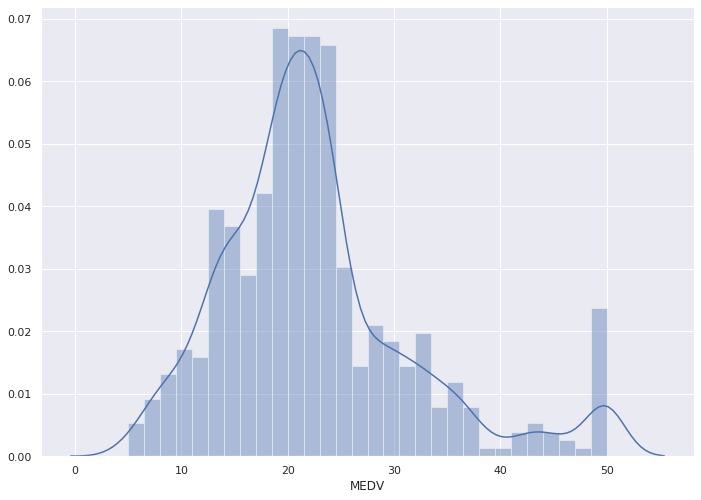

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [0]:
# Are there correlation matrices or visualisations 
# which can help you form intuitions about this dataset?

# How would you explore the data?

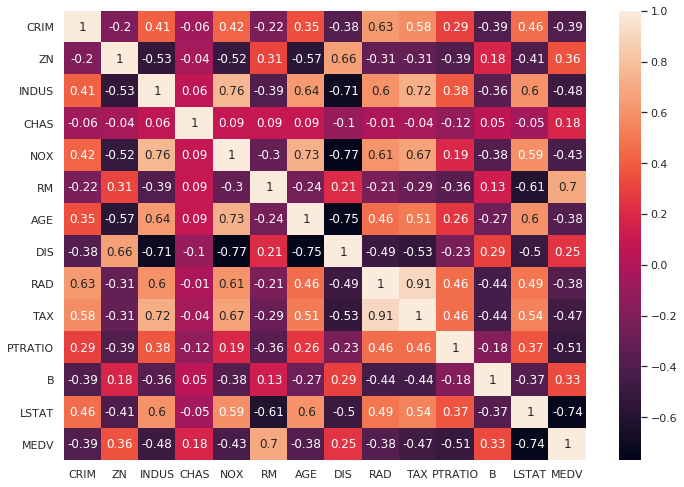

In [0]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

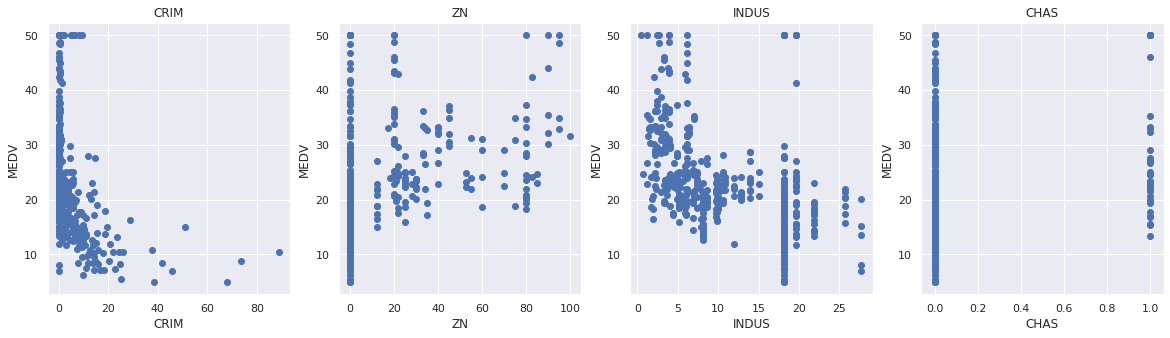

In [0]:
plt.figure(figsize=(20, 5))

features = ['CRIM', 'ZN', 'INDUS', 'CHAS']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

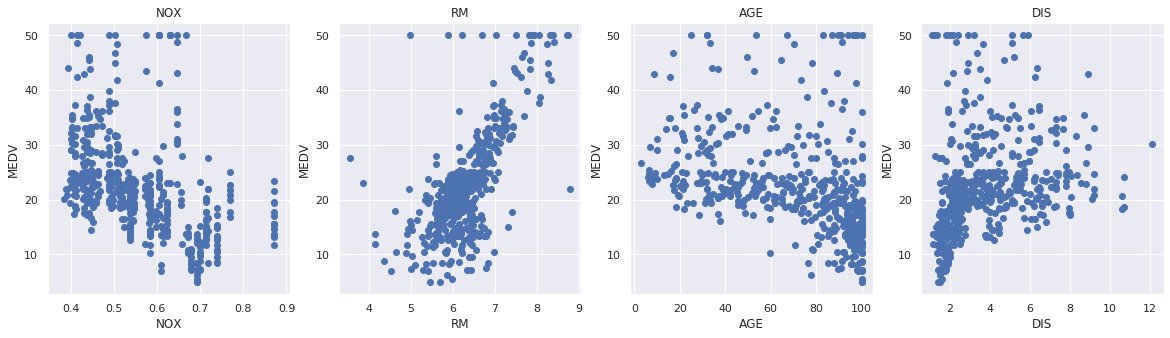

In [0]:
plt.figure(figsize=(20, 5))
features = ['NOX', 'RM', 'AGE', 'DIS']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

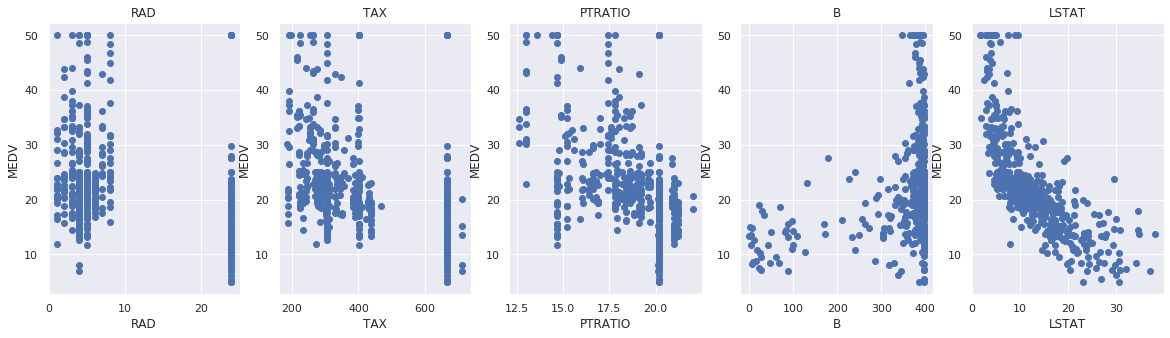

In [0]:
plt.figure(figsize=(20, 5))
features = ['RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [0]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Train (fit) the model

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)

Out[25]: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# What is the intercept? What are the coefficient(s)?

In [0]:
print(model.intercept_)
print(model.coef_)

-3.8411770790048863
[-0.63249856 5.46509877]

## Predict unseen values with our fitted model

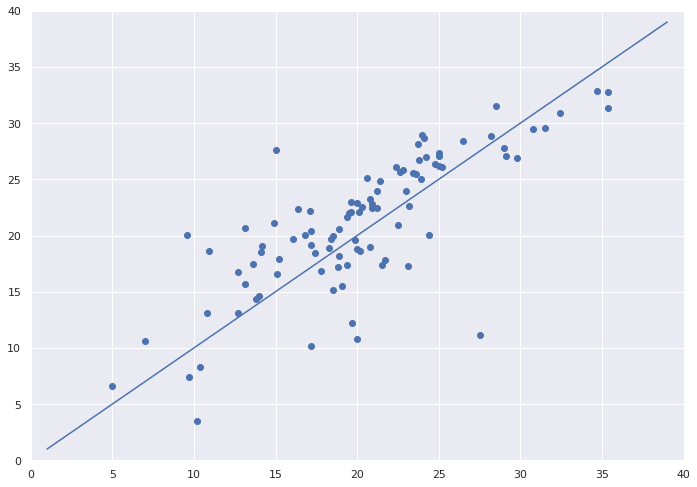

In [0]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
x = np.arange(1,40,1)
y = x
plt.plot(x,y)
plt.axis([0,40,0,40])
plt.show()

In [0]:
# call model.score on the X and Y training data to view the R Squared score
s1 = model.score(X_train, y_train)
# call model.score on the X and Y test data to view the R Squared score
s2 = model.score(X_test, y_test)

In [0]:
print(s1, s2)

0.6501592679428922 0.5739577415025858

In [0]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 3.8987597213823557
Mean Squared Error: 31.243290601783627
Root Mean Squared Error: 5.589569804715174